# Encoding Scaling

* Label Encoder
* One Hot Encoding
* Rare Encoding

# Import Necessary Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


# Label Encoding

In [9]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [15]:
new_df = label_encoder(df, "sex")

In [16]:
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [17]:
def label_encoder_dataframe(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ["int", "float"] and dataframe[col].nunique() == 2]
  for col in binary_cols:
    label_encoder(dataframe, col)

In [18]:
label_encoder_dataframe(df)

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000,1,0,7.250,S,Third,man,1,NaN,Southampton,0,0
1,1,1,0,38.000,1,0,71.283,C,First,woman,0,C,Cherbourg,1,0
2,1,3,0,26.000,0,0,7.925,S,Third,woman,0,NaN,Southampton,1,1
3,1,1,0,35.000,1,0,53.100,S,First,woman,0,C,Southampton,1,0
4,0,3,1,35.000,0,0,8.050,S,Third,man,1,NaN,Southampton,0,1


# One Hot Encoding

In [20]:
def one_hot_encoding(dataframe, drop_first=True):
  label_encoder_dataframe(dataframe)
  cat_cols = [col for col in dataframe.columns if 10 >= dataframe[col].nunique() > 2]
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
  return dataframe

In [21]:
new_df = one_hot_encoding(df)

In [22]:
new_df.head()

,survived,sex,age,fare,adult_male,alive,alone,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,1,22.000,7.250,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,1,0,38.000,71.283,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,0,26.000,7.925,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,1,0,35.000,53.100,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,0,1,35.000,8.050,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1


# Rare Encoding

In [24]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [25]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
print(f"observations: {df.shape[0]}")
print(f"variables: {df.shape[1]}")
print(f"cat_cols: {len(cat_cols)}")
print(f"num_cols: {len(num_cols)}")
print(f"cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

observations: 891
variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 8


In [28]:
def cat_summary(dataframe, col_name, plot=False):
    print(f"####################### {col_name} #######################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        if dataframe[col].dtypes == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

####################### embarked #######################
   embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642


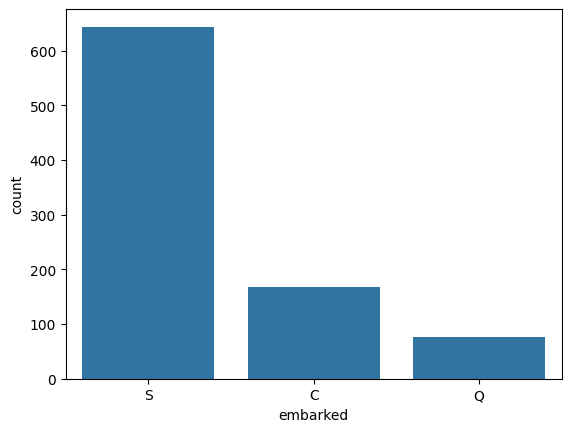

####################### class #######################
        class  Ratio
Third     491 55.107
First     216 24.242
Second    184 20.651


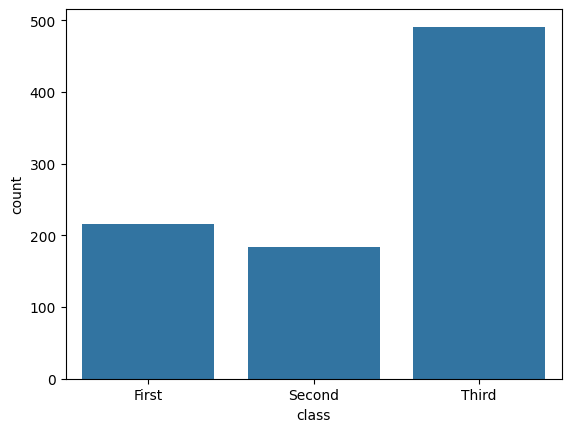

####################### who #######################
       who  Ratio
man    537 60.269
woman  271 30.415
child   83  9.315


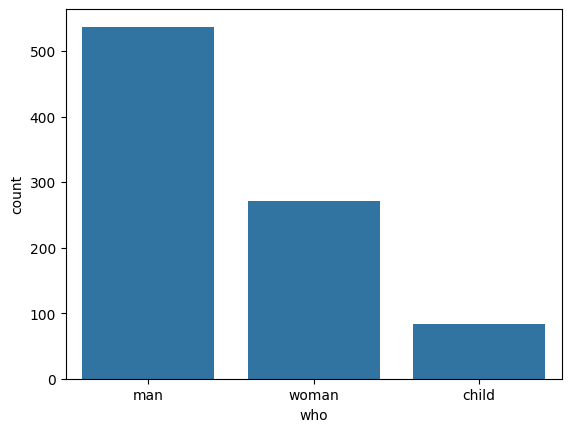

####################### deck #######################
   deck  Ratio
C    59  6.622
B    47  5.275
D    33  3.704
E    32  3.591
A    15  1.684
F    13  1.459
G     4  0.449


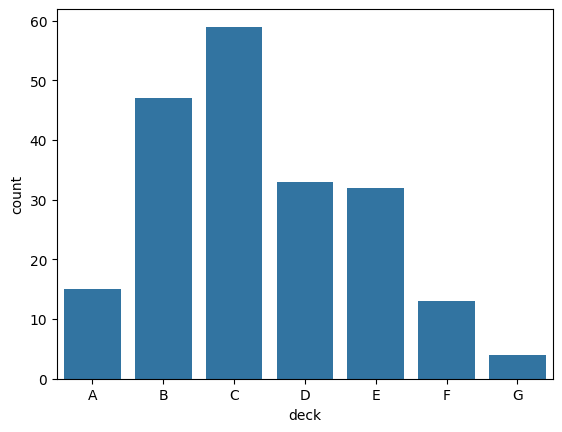

####################### embark_town #######################
             embark_town  Ratio
Southampton          644 72.278
Cherbourg            168 18.855
Queenstown            77  8.642


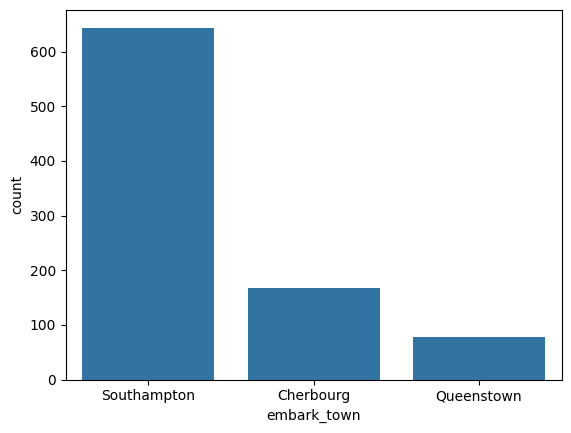

####################### survived #######################
   survived  Ratio
0       549 61.616
1       342 38.384


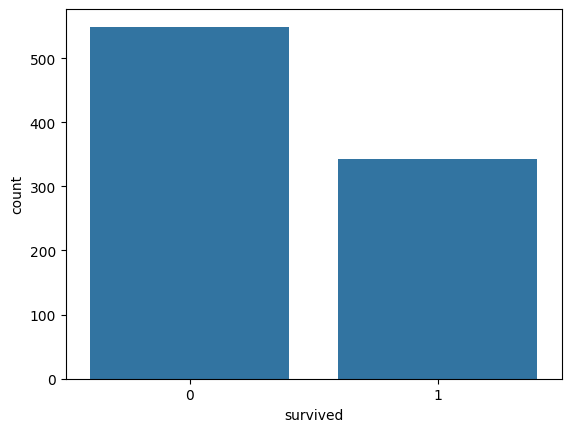

####################### pclass #######################
   pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651


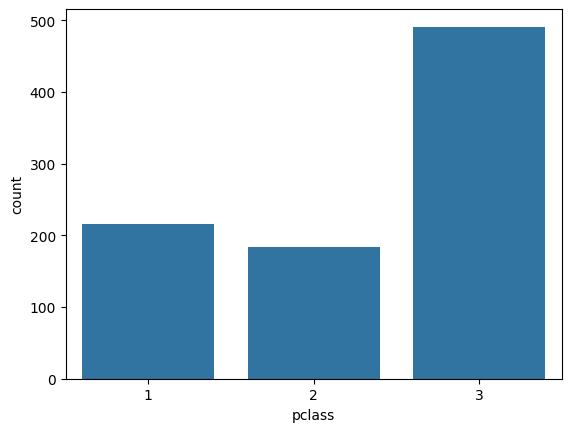

####################### sex #######################
   sex  Ratio
1  577 64.759
0  314 35.241


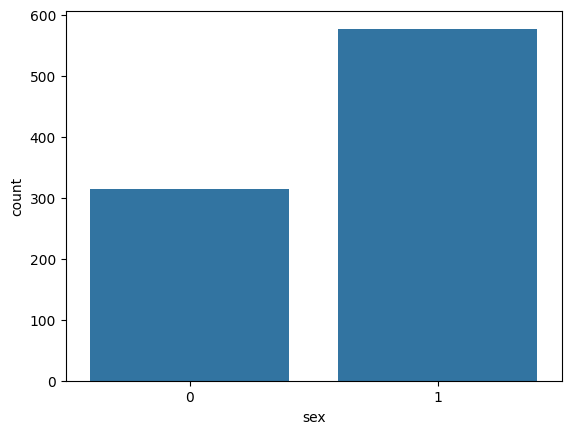

####################### sibsp #######################
   sibsp  Ratio
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561


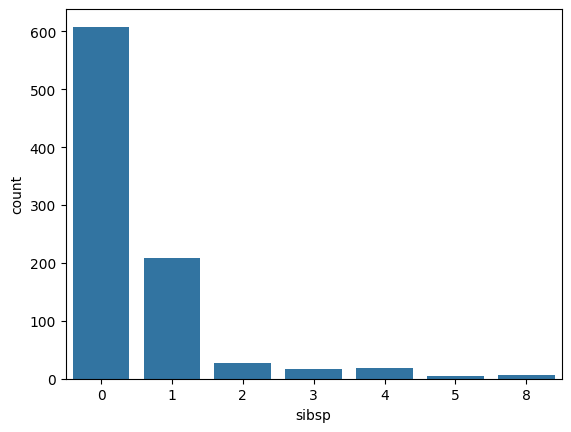

####################### parch #######################
   parch  Ratio
0    678 76.094
1    118 13.244
2     80  8.979
5      5  0.561
3      5  0.561
4      4  0.449
6      1  0.112


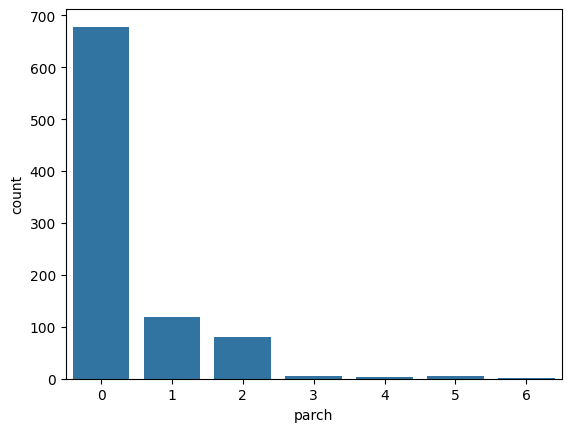

####################### adult_male #######################
   adult_male  Ratio
1         537 60.269
0         354 39.731


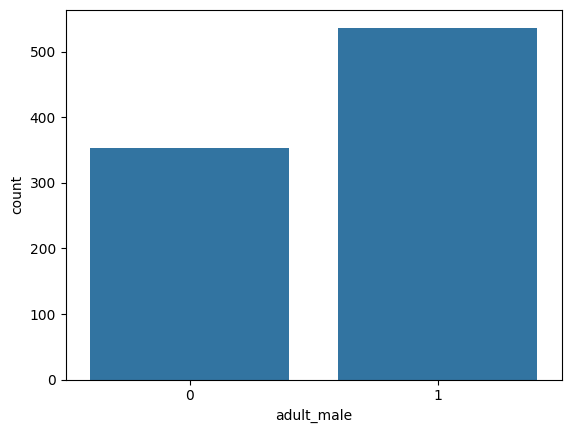

####################### alive #######################
   alive  Ratio
0    549 61.616
1    342 38.384


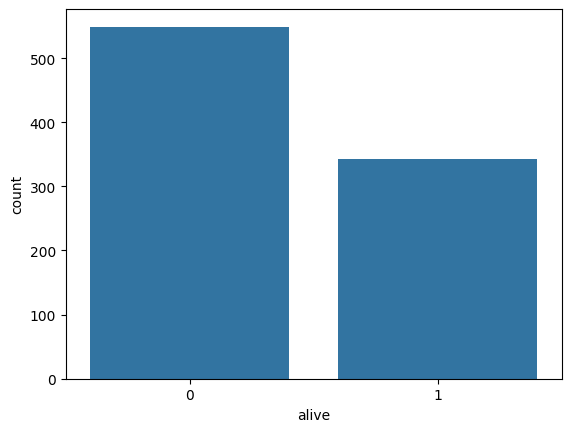

####################### alone #######################
   alone  Ratio
1    537 60.269
0    354 39.731


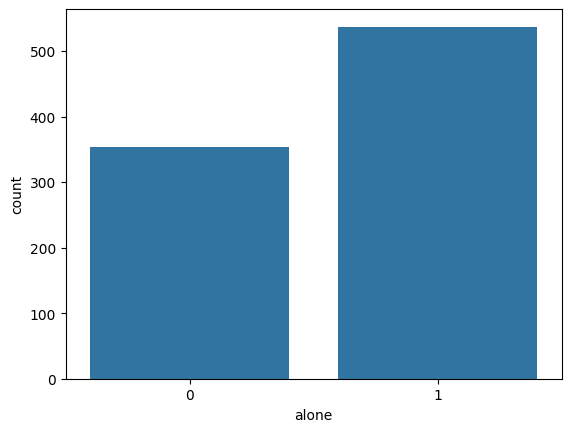

In [29]:
cat_summary_df(df)

In [36]:
def rare_analyser(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "Ratio": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n")

In [37]:
rare_analyser(df, "survived")

embarked : 3
   COUNT  Ratio  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    644  0.723        0.337

class : 3
        COUNT  Ratio  TARGET_MEAN
First     216  0.242        0.630
Second    184  0.207        0.473
Third     491  0.551        0.242

who : 3
       COUNT  Ratio  TARGET_MEAN
child     83  0.093        0.590
man      537  0.603        0.164
woman    271  0.304        0.756

deck : 7
   COUNT  Ratio  TARGET_MEAN
A     15  0.017        0.467
B     47  0.053        0.745
C     59  0.066        0.593
D     33  0.037        0.758
E     32  0.036        0.750
F     13  0.015        0.615
G      4  0.004        0.500

embark_town : 3
             COUNT  Ratio  TARGET_MEAN
Cherbourg      168  0.189        0.554
Queenstown      77  0.086        0.390
Southampton    644  0.723        0.337

survived : 2
   COUNT  Ratio  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000

pclass : 3
   COUNT  Ratio  TARGET_MEAN
1    216  0.242        0.6

In [45]:
def rare_encoder(dataframe, rare_prec):
  temp_df = dataframe.copy()
  rare_columns = [col for col in dataframe.columns if temp_df[col].dtypes in ["category", "object"]
                  and (temp_df[col].value_counts() / len(temp_df) < rare_prec).any(axis=None)]
  for col in rare_columns:
    tmp = temp_df[col].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_prec].index
    temp_df[col] = np.where(temp_df[col].isin(rare_labels), "Rare", temp_df[col])
  return temp_df

In [49]:
new_df = rare_encoder(df, 0.01)

In [50]:
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000,1,0,7.250,S,Third,man,1,NaN,Southampton,0,0
1,1,1,0,38.000,1,0,71.283,C,First,woman,0,C,Cherbourg,1,0
2,1,3,0,26.000,0,0,7.925,S,Third,woman,0,NaN,Southampton,1,1
3,1,1,0,35.000,1,0,53.100,S,First,woman,0,C,Southampton,1,0
4,0,3,1,35.000,0,0,8.050,S,Third,man,1,NaN,Southampton,0,1


In [51]:
new_df["deck"].value_counts()

C       59
B       47
D       33
E       32
A       15
F       13
Rare     4
Name: deck, dtype: int64

In [48]:
rare_analyser(df, "survived")

embarked : 3
   COUNT  Ratio  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    644  0.723        0.337

class : 3
        COUNT  Ratio  TARGET_MEAN
First     216  0.242        0.630
Second    184  0.207        0.473
Third     491  0.551        0.242

who : 3
       COUNT  Ratio  TARGET_MEAN
child     83  0.093        0.590
man      537  0.603        0.164
woman    271  0.304        0.756

deck : 7
   COUNT  Ratio  TARGET_MEAN
A     15  0.017        0.467
B     47  0.053        0.745
C     59  0.066        0.593
D     33  0.037        0.758
E     32  0.036        0.750
F     13  0.015        0.615
G      4  0.004        0.500

embark_town : 3
             COUNT  Ratio  TARGET_MEAN
Cherbourg      168  0.189        0.554
Queenstown      77  0.086        0.390
Southampton    644  0.723        0.337

survived : 2
   COUNT  Ratio  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000

pclass : 3
   COUNT  Ratio  TARGET_MEAN
1    216  0.242        0.6